# Perception 3D

## 1. Mise en place de l'environnement

### 1.1 Open CV test

In [ ]:
import cv2 as cv

def displayCam(cameraId=0):
    capture = cv.VideoCapture(cameraId)
    cv.namedWindow('Camera', cv.WINDOW_NORMAL)

    while(True):
        # Capture frame-by-frame
        _, frame = capture.read()

        # Display the resulting frame
        cv.imshow('Camera', frame)

        # Wait 100 ms
        key = cv.waitKey(100)

        # Quit with escape or q
        if key == ord('\x1b') or key == ord('q'):
            break

    capture.release()
    cv.destroyAllWindows()

def displayImage(imagePath=''):
    cv.namedWindow('Image', cv.WINDOW_NORMAL)

    frame = cv.imread(imagePath)
    cv.imshow('Image', frame)
    cv.waitKey(0)

    cv.destroyAllWindows()


In [1]:
# displayCam(cameraId=0)

### 1.2 Matplotlib test

In [2]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(20210204)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin


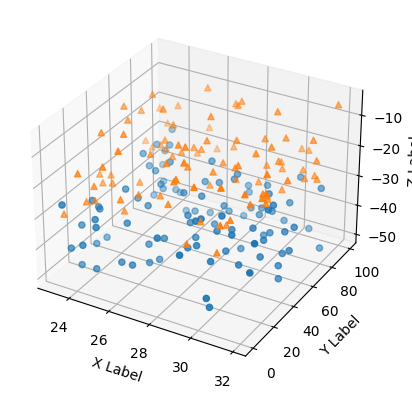

In [3]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    n = 100

    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
        xs = randrange(n, 23, 32)
        ys = randrange(n, 0, 100)
        zs = randrange(n, zlow, zhigh)
        ax.scatter(xs, ys, zs, marker=m)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()

## 2. Vision Monoculaire

### 2.1 Calibration

### 2.1.2 Acquérir les images

In [4]:
from Calibration import MonoCalibration
from Rectification import MonoRectification

calib = MonoCalibration(11, 4, 0.04, 'symmetric_circles')

In [5]:
calib.acquire()

`Quel type de mire avez-vous à disposition ?`

Des sphères asymétriques

`Comment fonctionne la détection de ce type de mire ?`

[Lien Doc Fonction](https://docs.opencv.org/3.4/d9/d0c/group__calib3d.html)

In [7]:
!ls results/acquired

0.png	14.png	19.png	23.png	28.png	32.png	37.png	41.png	7.png
10.png	15.png	1.png	24.png	29.png	33.png	38.png	42.png	8.png
11.png	16.png	20.png	25.png	2.png	34.png	39.png	4.png	9.png
12.png	17.png	21.png	26.png	30.png	35.png	3.png	5.png
13.png	18.png	22.png	27.png	31.png	36.png	40.png	6.png
